In [2]:
import pandas as pd
import seaborn as sns

The dataset used in the question is Abalone dataset which is about abalone fish and its physical characteristics. This information is used to predict the age of the abalone fish with respect to the number of rings in the shell. 

In [3]:
df = pd.read_csv("N:\\Geethu Academics\\ECE 657A\\abalone.csv")
#df = pd.read_csv(r"C:\Users\Vinitha RM\Downloads\abalone.csv")

The dataframe has 8 features(Sex, Length, Diameter, Height, Whole weight, Shucked weight, Viscera weight and Shell weight), one target variable(Rings) and 4177 objects. The given dataset did not have headers, so I added headers for each features.

In [4]:
column_names = ["Sex", "Length", "Diameter", "Height", "Whole Weight", "Shucked Weight", "Viscera Weight", "Shell Weight", "Rings"]
df.columns = column_names
print(df)

     Sex  Length  Diameter  Height  Whole Weight  Shucked Weight  \
0      M   0.350     0.265   0.090        0.2255          0.0995   
1      F   0.530     0.420   0.135        0.6770          0.2565   
2      M   0.440     0.365   0.125        0.5160          0.2155   
3      I   0.330     0.255   0.080        0.2050          0.0895   
4      I   0.425     0.300   0.095        0.3515          0.1410   
...   ..     ...       ...     ...           ...             ...   
4171   F   0.565     0.450   0.165        0.8870          0.3700   
4172   M   0.590     0.440   0.135        0.9660          0.4390   
4173   M   0.600     0.475   0.205        1.1760          0.5255   
4174   F   0.625     0.485   0.150        1.0945          0.5310   
4175   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera Weight  Shell Weight  Rings  
0             0.0485        0.0700      7  
1             0.1415        0.2100      9  
2             0.1140        0.1550     10  
3      

There are no missing values and was checked using isna().sum() function which gave us the following output. 

In [5]:
#Check for missing values
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Rings             0
dtype: int64

## Summary Statistics

## Mean

In [6]:
#Mean
df.mean()

Length            0.524009
Diameter          0.407892
Height            0.139527
Whole Weight      0.828818
Shucked Weight    0.359400
Viscera Weight    0.180613
Shell Weight      0.238852
Rings             9.932471
dtype: float64

## Median

In [7]:
#Median
df.median()

Length            0.54500
Diameter          0.42500
Height            0.14000
Whole Weight      0.79975
Shucked Weight    0.33600
Viscera Weight    0.17100
Shell Weight      0.23400
Rings             9.00000
dtype: float64

## Variance

In [8]:
#Variance
df.var()

Length             0.014425
Diameter           0.009850
Height             0.001749
Whole Weight       0.240515
Shucked Weight     0.049275
Viscera Weight     0.012017
Shell Weight       0.019380
Rings             10.391606
dtype: float64

## Skew
Skewness of the  dataset is as follows:

In [9]:
#Skewness
df.skew()

Length           -0.640240
Diameter         -0.609457
Height            3.129241
Whole Weight      0.530576
Shucked Weight    0.718724
Viscera Weight    0.591463
Shell Weight      0.620547
Rings             1.115157
dtype: float64

From the values of skew, we can see that Length and Diameter is negatively skewed with measure of skewness -0.64 and -0.61 respectively ie; the data points cluster in the right side of the mean and  tails are longer on the left. Moreover, we can also understand that with negative skewness, chances of outliers in the left side is high.
Whereas all the other features are positively skewed with data points cluster on the left side before mean and tails are longer in the right. With positive skewness, chances of outliers in the right side is high.

## Kurtosis
Kurtosis of the dataset is as follows:

In [10]:
#Kurtosis
df.kurt()

Length             0.064698
Diameter          -0.045675
Height            76.046000
Whole Weight      -0.024136
Shucked Weight     0.594448
Viscera Weight     0.083574
Shell Weight       0.531350
Rings              2.335940
dtype: float64

Kurtosis is the tailedness of a distribution. Kutosis can be classified into 3 categories: Leptokurtic where measeure of Kurtosis > 3, Mesokurtic where measure of Kurtosis = 3 and Platykurtic where measure of kurtic is less than 3.
From the above output, we can see that all other features except Height is Platkurtic and Height is Leptokurtic.

In [11]:
df.describe()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


## Pairplot using Seaborn
Below shown is the pair plot of all the features.

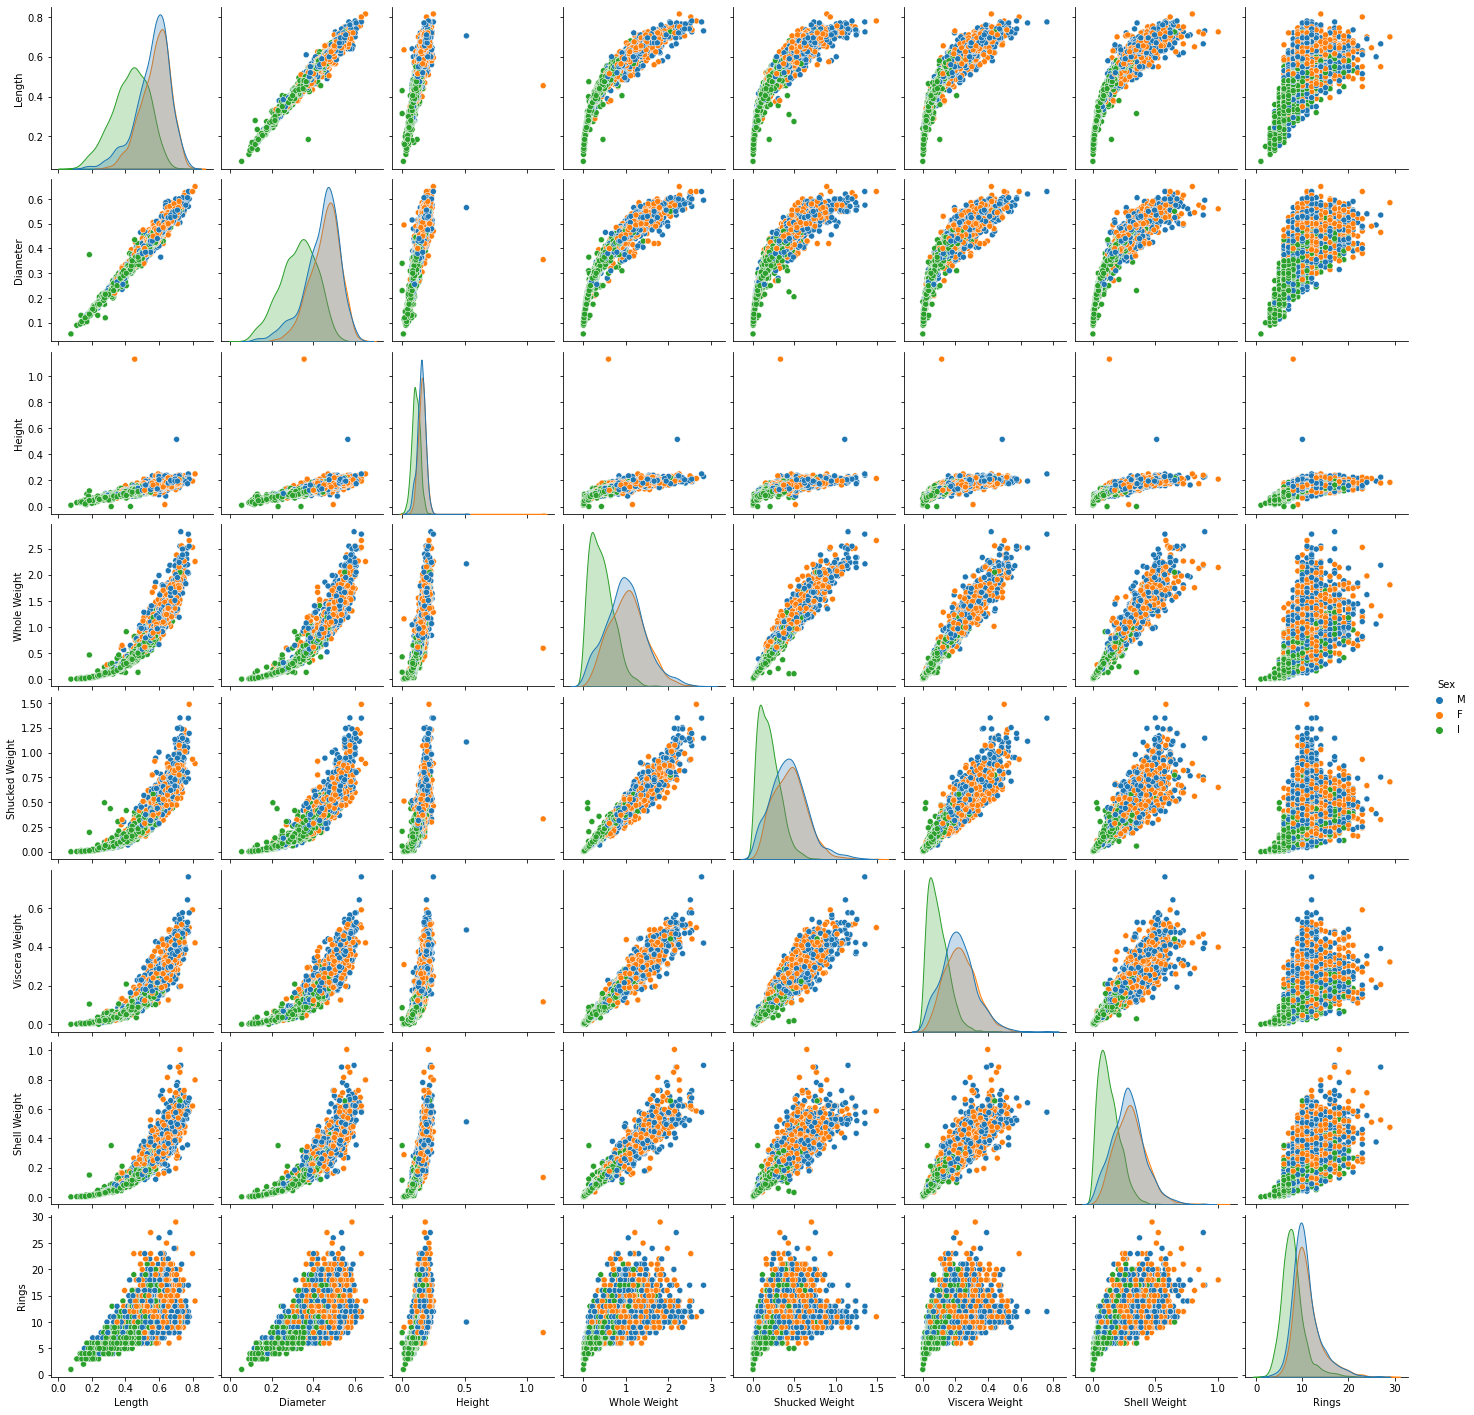

In [12]:
sns.pairplot(df, hue = "Sex")

Using heatmap to find the correlation of each varibles and from the heatmap it is understood that Shell weight is most correlatd, followed by Diameter, Height, Length  and Whole weight. Shucked weight is the least correlated.

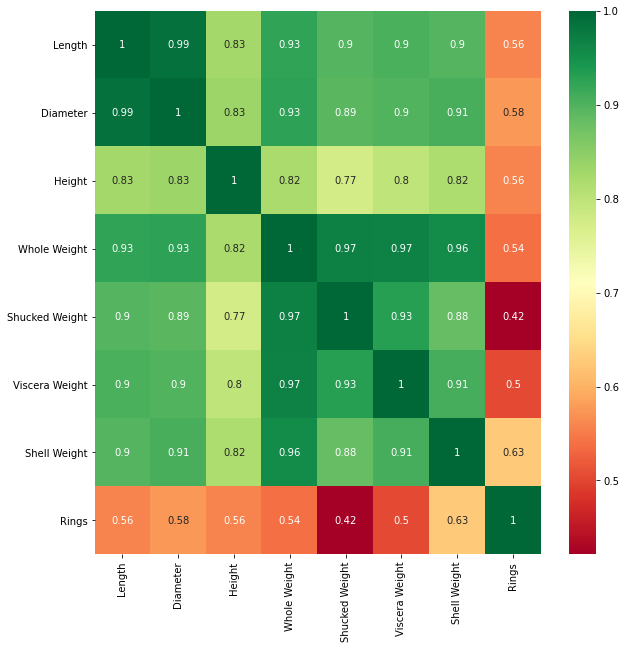

In [13]:
#finding correlations for each feature
import matplotlib.pyplot as plt
corr_mat = df.corr()
top_corr_features = corr_mat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

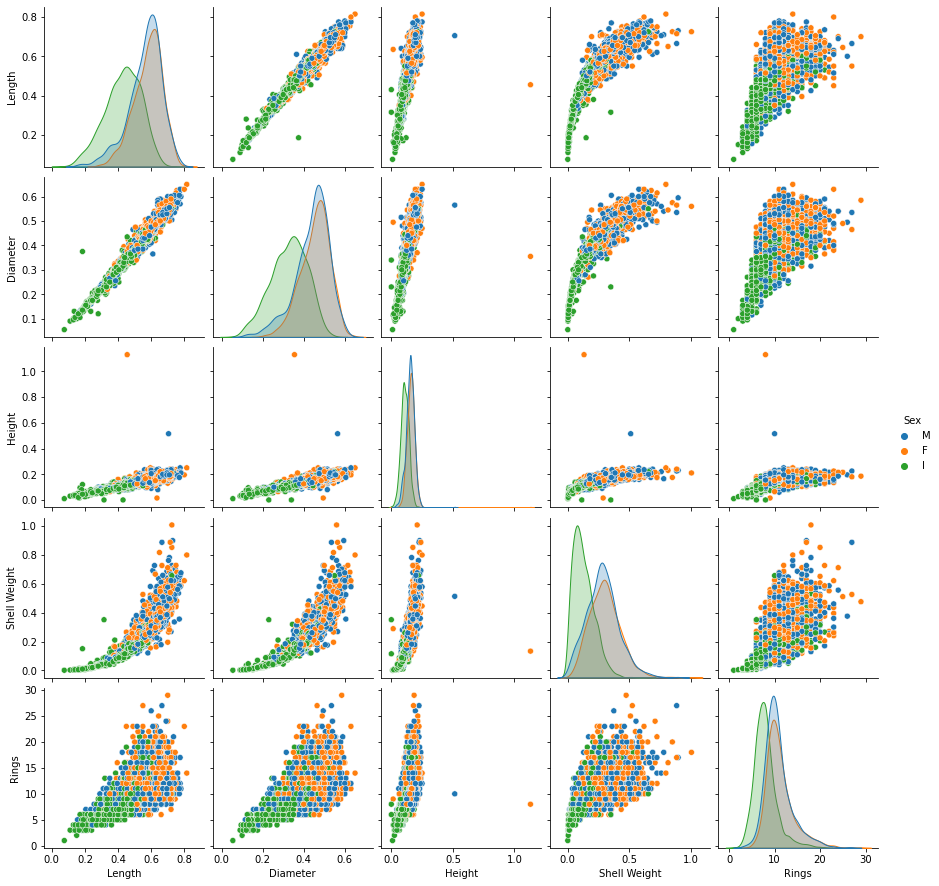

In [14]:
#pairplot for specific features
cols_to_plot = ["Sex", "Length", "Diameter", "Height", "Shell Weight", "Rings"]
sns.pairplot(df[cols_to_plot], hue = "Sex")

### Balanced and imbalanced dataset
A imbalanced dataset is one which contains classes with skewed number of samples. In the given dataset, the imbalance is said to be extreme, as the smallest class, which contains 1 sample, constitutes to less than 1% of the entire dataset that consists of 4177 samples.

The following 4 cells show the spread of data before and after balancing, respectively. The dataset is balanced using undersampling to reduce the number of samples for classes with more than 100 samples, and oversampling to increase the number of samples for classes with less than 100 samples. 

The RandomUnderSampler and RandomOverSampler methods were used for oversampling and undersampling the datasets respectively. 

Two sets of dataset will be used for each of the steps to show the difference in perfomance for before and after balancing, 
1. the imbalanced, normalized dataset: X,y
2. the balanced, normalized dataset: X_balanced,y_balanced

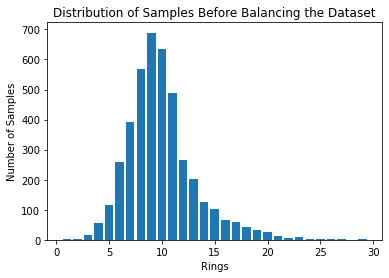

In [18]:
from collections import Counter
import matplotlib.pyplot as plt
from numpy import where

df.head()
y = df["Rings"]
y = y.values
abalone = df.drop("Sex",axis=1)
abalone.head()
X = abalone
X = X.values

counter = Counter(y)
counterplots=dict(counter)
countery=list(counterplots.values())
counterx=list(counterplots.keys())
plt.bar(counterx, countery)
plt.xlabel('Rings')
plt.ylabel('Number of Samples')
plt.title('Distribution of Samples Before Balancing the Dataset')
plt.show()

Counter before balancing:  Counter({9: 689, 10: 634, 8: 568, 11: 487, 7: 391, 12: 267, 6: 259, 13: 203, 14: 126, 5: 115, 15: 102, 16: 67, 17: 58, 4: 57, 18: 42, 19: 32, 20: 26, 3: 15, 21: 14, 23: 9, 22: 6, 27: 2, 24: 2, 1: 1, 26: 1, 29: 1, 2: 1, 25: 1})


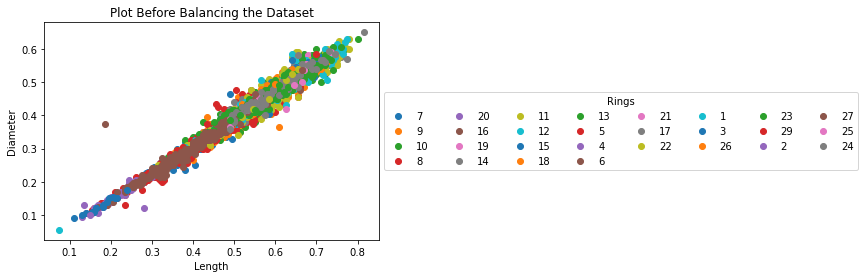

In [19]:
print("Counter before balancing: ",counter)

for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend(loc="center left", ncol=len(abalone.columns),bbox_to_anchor=(1, 0.5),title="Rings")
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.title('Plot Before Balancing the Dataset')
plt.show()

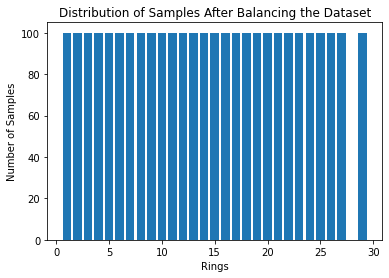

In [20]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
oversample = SMOTE()
over = RandomOverSampler(sampling_strategy={16: 100, 17: 100, 4: 100, 18:100, 19: 100, 20: 100, 3: 100, 21: 100, 23: 100, 22: 100, 27: 100, 24: 100, 1: 100, 26: 100, 29: 100, 2: 100, 25: 100})
under = RandomUnderSampler(sampling_strategy={9: 100, 10: 100, 8: 100, 11: 100, 7: 100, 12: 100, 6: 100, 13: 100, 14: 100, 5: 100, 15: 100,})
steps = [('o', over),('u',under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_balanced, y_balanced = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter_balanced = Counter(y_balanced)

counterplots=dict(counter_balanced)
countery=list(counterplots.values())
counterx=list(counterplots.keys())
plt.bar(counterx, countery)
plt.xlabel('Rings')
plt.ylabel('Number of Samples')
plt.title('Distribution of Samples After Balancing the Dataset')
plt.show()

Counter after balancing:  Counter({1: 100, 2: 100, 3: 100, 4: 100, 5: 100, 6: 100, 7: 100, 8: 100, 9: 100, 10: 100, 11: 100, 12: 100, 13: 100, 14: 100, 15: 100, 16: 100, 17: 100, 18: 100, 19: 100, 20: 100, 21: 100, 22: 100, 23: 100, 24: 100, 25: 100, 26: 100, 27: 100, 29: 100})


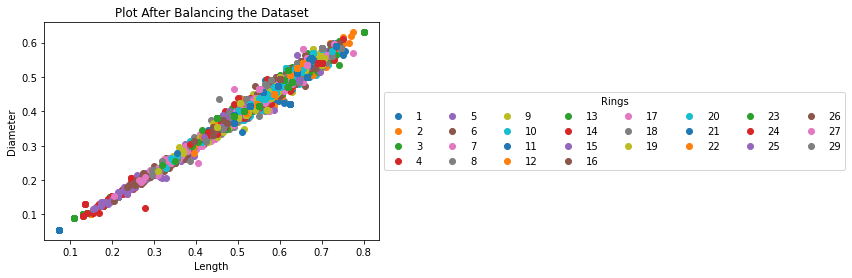

In [21]:
print("Counter after balancing: ",counter_balanced)
# scatter plot of examples by class label

for label, _ in counter_balanced.items():
    row_ix = where(y_balanced == label)[0]
    plt.scatter(X_balanced[row_ix, 0], X_balanced[row_ix, 1], label=str(label))
plt.legend(loc="center left", ncol=len(abalone.columns),bbox_to_anchor=(1, 0.5),title="Rings")
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.title('Plot After Balancing the Dataset')
plt.show()

## Normalizing data using z-score

In [22]:
def zscore_calc(df):
    df_copy = df[["Length", "Diameter", "Height", "Whole Weight", "Shucked Weight", "Viscera Weight", "Shell Weight"]].copy()
    for column in df_copy.columns:
        df_copy[column] = (df_copy[column] - df_copy[column].mean())/ df_copy[column].std()
        
    return df_copy

df_standardized = zscore_calc(df)
df_standardized


,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight
0,-1.448834,-1.439720,-1.184110,-1.230197,-1.170827,-1.205183,-1.212909
1,0.049886,0.122000,-0.108235,-0.309564,-0.463555,-0.356801,-0.207252
2,-0.699474,-0.432158,-0.347318,-0.637852,-0.648256,-0.607666,-0.602332
3,-1.615358,-1.540476,-1.423194,-1.271998,-1.215876,-1.287284,-1.320658
4,-0.824367,-1.087073,-1.064569,-0.973276,-0.983873,-0.940633,-0.853746
...,...,...,...,...,...,...,...
4171,0.341303,0.424269,0.609016,0.118637,0.047753,0.532632,0.072895
4172,0.549459,0.323513,-0.108235,0.279722,0.358592,0.309133,0.155502
4173,0.632721,0.676159,1.565350,0.707924,0.748268,0.975067,0.496707
4174,0.840876,0.776915,0.250391,0.541741,0.773045,0.733324,0.410508
